<a href="https://colab.research.google.com/github/mwinzie/Nairobi-Hospital-Hypothyroidism-Model/blob/master/Moringa_Data_Science_Core_W8_Independent_Project_2019_09_Agnes_Mueni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [0]:
#loading the hypothyroid dataset
hyp = pd.read_csv('hypothyroid.csv')

#previewing the first 5 observations in the dataset
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
#previewing the last 5 records in the dataset
hyp.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


From the observations above, it seems some observations are marked with a ?. I shall look at the number of missing values and the count of the ? in the dataset

In [0]:
#checking the dataset shape
hyp.shape

#the dataset that 3163 rows and 26 columns

(3163, 26)

In [0]:
#checking the basic information of the dataset
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

In [0]:
#checking for missing values
hyp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## Data Cleaning
> There are number missing values in the data. Now looking at the count of the ? in the dataset

In [0]:
#checking the number of times ? appears in each column
(hyp.iloc[:,1:26] == '?').sum()

age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

Looking at the observations, the column sex has the least number of questionmarks, 73 i.e 2% of the whole dataset.
The TT4, T4U, and FTI all occupy 8% of the dataset. 3163
TSH - 14%
T3 - 21% 
TBG is the column with the largest number of ?. They occupy 91% of the dataset. I shall now replace with the ? with Nan and see how they compare.

In [0]:
#replacing all the ? with the nan value
for i in range(1,26):
  hyp.iloc[:, i].replace('?', np.nan, inplace=True)

In [0]:
hyp.isnull().sum()
#all questionmarks have now been replaced with the nan value. A preview is shown in the next cell

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [0]:
(hyp.iloc[:,1:26] == '?').sum()

#all questionmarks are now replaced

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
#the sex column has 2% of missing values in the whole dataset. This is a relative small number. I opt to delete all the nan values in the sex column
hyp.dropna(subset=['sex'], inplace = True)

In [36]:
hyp.shape

(3090, 26)

In [0]:
#the TBG column has a relative high number of missing values, 91%. The corresponding column, TBG measured indicates a yes or no whether the test was conducted or not. 
#Most of the nan values exist where the measured is a no. My assumption will be the test was not carried out and I shall fill all the nan values with a 0.
hyp['TBG'] = hyp['TBG'].fillna(0)

In [38]:
#previewing the first 10 observations and checking the changes
hyp.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,0
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,0
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,0
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,0
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,NaN,y,39,y,1.21,y,32,n,0
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,NaN,y,7.60,y,1.02,y,7.50,n,0


In [39]:
#previewing the unique values in every column
for i in hyp.columns:
  #to print a line in between the columns

  print('\n')
  print('column name:', i)
  print(hyp[i].unique())



column name: status
[hypothyroid, negative]
Categories (2, object): [hypothyroid, negative]


column name: age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


column name: sex
[M, F]
Categories (2, object): [M, F]


column name: on_thyroxine
[f, t]
Categories (2, object): [f, t]


column name: query_on_thyroxine
[f, t]
Categories (2, object): [f, t]


column name: on_antithyroid_medication
[f, t]
Categories (2, object): [f, t]


column name: thyroid_surgery
[f, t]
Categories (2, object): [f, t]


column name: query_hypothyroid
[f, t]
Categories (2, object): [f, t]


column

In [0]:
#changing columns to type category
hyp[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']] = hyp[['status', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']].astype('category')


In [98]:
#the numerical columns have the data type object. I shall fill all the nan values with the mode of each of the columns so as to be able to convert the columns to
#int or float (where there are decimal points) data types
ncols = hyp[['TSH', 'T3', 'TT4','T4U', 'FTI']]
ncols.mode()

,TSH,T3,TT4,T4U,FTI
0,0.0,1.8,98.0,0.98,98.0


In [56]:
hyp['age'].mode()

0    59
1    60
dtype: object

In [0]:
#filling the nan values of the numerical columns with the mode value
hyp['age'] = hyp['age'].fillna(59)
hyp['TSH'] = hyp['TSH'].fillna(0)
hyp['T3'] = hyp['T3'].fillna(1.80)
hyp['TT4'] = hyp['TT4'].fillna(98)
hyp['T4U'] = hyp['T4U'].fillna(0.98)
hyp['FTI'] = hyp['FTI'].fillna(98)


In [72]:
#checking to see that all nan values have been replaced
hyp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [73]:
hyp.dtypes

status                       category
age                            object
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                            object
T3_measured                  category
T3                             object
TT4_measured                 category
TT4                            object
T4U_measured                 category
T4U                            object
FTI_measured                 category
FTI                            object
TBG_measured                 category
TBG                            object
dtype: objec

In [0]:
#converting the numerical datatypes to type int or float
hyp['age'] = hyp['age'].astype(int)
hyp[['TSH', 'T3', 'TT4','T4U', 'FTI','TBG']] = hyp[['TSH', 'T3', 'TT4','T4U', 'FTI','TBG']].astype(float)

In [75]:
#confirming the changes have been made to the data types
hyp.dtypes

status                       category
age                             int64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [0]:
#saving the cleaned dataset to csv
hyp.to_csv('cleanhypothyroid.csv')

# Exploratory Data Analysis

In [77]:
hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [78]:
#the function shows the measures of central tendencies and location for the dataset
hyp.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.00000,3090.000000,3090.000000
mean,52.201942,5.062036,1.902330,107.603204,0.98479,110.646893,2.566861
std,18.226782,22.395322,0.870453,43.414038,0.21021,41.525491,10.104470
min,1.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000
25%,37.250000,0.000000,1.500000,85.000000,0.87000,92.000000,0.000000
50%,58.000000,0.400000,1.800000,100.000000,0.98000,104.000000,0.000000
75%,65.000000,1.700000,2.200000,124.000000,1.05000,125.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.21000,485.000000,122.000000


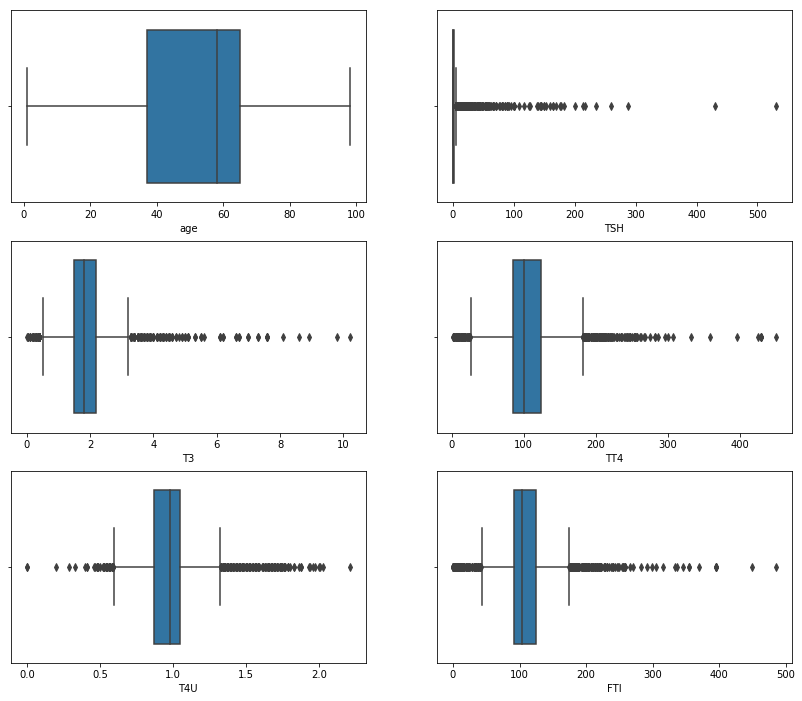

In [95]:
#checking for the presence of outliers
#created a list for all the numerical columns in the hyp dataframe
#used a for loop to iterate over the list of the numerical columns so as to plot all the boxplots

numericcols = ['age','TSH', 'T3', 'TT4','T4U', 'FTI']
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize=(14,12))
for ax, data,column in zip(axes.flatten(),hyp,numericcols):
  sns.boxplot(hyp[column],ax=ax)

In [99]:
Q1 = hyp.quantile(0.25)
Q3 = hyp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age    27.75
TSH     1.70
T3      0.70
TT4    39.00
T4U     0.18
FTI    33.00
TBG     0.00
dtype: float64


In [0]:
#checking for outliers using the inter quartile range
(hyp <(Q1 - 1.5*IQR)) |(hyp > (Q3 + 1.5*IQR))

In [0]:
#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.shape

In [0]:
hyp.groupby('status','sex')['sex'].count().plot(kind='bar')
plt.title('')

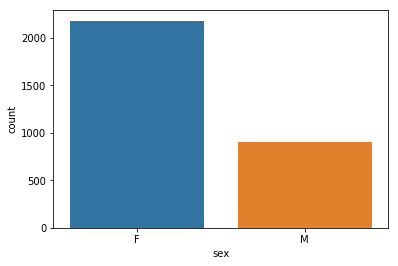

In [92]:
#graph showing the number of candidates who participated in the exercise in terms of gender.
sns.countplot(x='sex',data=hyp,)

In [104]:
hyp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

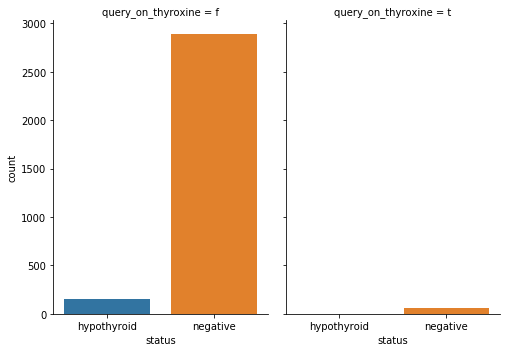

In [108]:
sns.catplot(x="status", col="query_on_thyroxine", data=hyp, kind="count", height=5, aspect=.7);  

# Decision Tree Model

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [0]:
le = preprocessing.LabelEncoder()
hyp['status'] = le.fit_transform(hyp['status'])
hyp['sex'] = le.fit_transform(hyp['sex'])

In [0]:
test_features = hyp.drop(['status'], axis = 1)
X = test_features
y = hyp['status']

In [0]:
#converting the features into dummies
X  = pd.get_dummies(X, drop_first = True)

In [152]:
#training the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0 )
tree = DecisionTreeClassifier()
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.982200647249191


In [153]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = test_features,class_names=['Not a social drinker', 'Social drinker'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism.png')
Image(graph.create_png())

ValueError: ignored